In [1]:
import pandas as pd

### The Cookie Problem - using Pandas table

In [4]:
table = pd.DataFrame(index=['Bowl 1', 'Bowl 2'])
table['prior'] = [1/2, 1/2]
table

,prior
Bowl 1,0.5
Bowl 2,0.5


In [5]:
table['likelihood'] = [3/4, 1/2]
table

,prior,likelihood
Bowl 1,0.5,0.75
Bowl 2,0.5,0.50


In [7]:
table['unnorm'] = table['prior'] * table['likelihood']
table

,prior,likelihood,uniform,unnorm
Bowl 1,0.5,0.75,0.375,0.375
Bowl 2,0.5,0.50,0.250,0.250


In [8]:
prob_data = table['unnorm'].sum()
prob_data

0.625

In [9]:
table['posterior'] = table['unnorm'] / prob_data
table

,prior,likelihood,uniform,unnorm,posterior
Bowl 1,0.5,0.75,0.375,0.375,0.6
Bowl 2,0.5,0.50,0.250,0.250,0.4


### The Cookie Problem Revisited - using Pmf

In [16]:
from empiricaldist import Pmf

In [17]:
prior = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


In [18]:
# Drawing a vanilla cookie
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


In [19]:
type(posterior)

empiricaldist.empiricaldist.Pmf

In [20]:
posterior.normalize()

0.625

In [21]:
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


In [23]:
# Drawing once more vanilla cookie
posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


In [24]:
# What if drawing and get a chocolate cookie
likelihood_chocolate = [0.25, 0.5]
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


### A cookie problem with 101 bowls

In [25]:
import numpy as np

In [31]:
# Probs of vanilla cookies are from 0% to 100% from Bowl 0 to Bowl 100
hypos = np.arange(101)
prior = Pmf(1,hypos) # OR Pmf.from_seq(hypos)
prior.normalize()

101

In [32]:
prior

,probs
0,0.009901
1,0.009901
2,0.009901
3,0.009901
4,0.009901
...,...
96,0.009901
97,0.009901
98,0.009901
99,0.009901


In [35]:
likelihood_vanilla = hypos / 100
likelihood_vanilla[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

In [37]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1.head(6)

,probs
0,0.000000
1,0.000198
2,0.000396
3,0.000594
4,0.000792
5,0.000990


In [40]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()

0.6699999999999999

<AxesSubplot:>

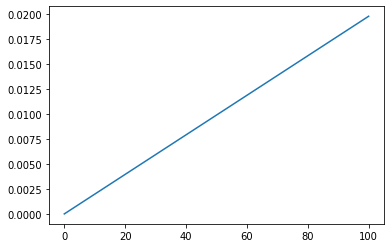

In [39]:
posterior1.plot()

<AxesSubplot:>

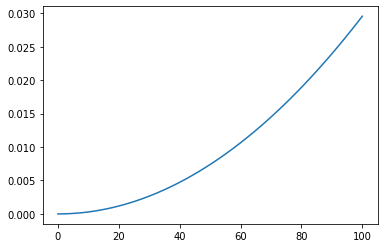

In [41]:
posterior2.plot()

In [43]:
likelihood_chocolate = 1 - hypos/100
posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()

0.2462686567164179

<AxesSubplot:>

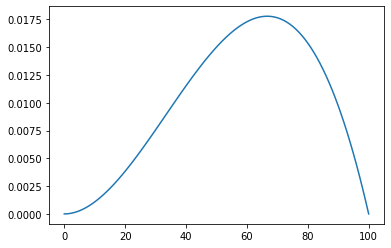

In [44]:
posterior3.plot()

In [46]:
posterior3.idxmax(), posterior3.max_prob()

(67, 67)